In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Для 3D-графиков
from collections import deque
from bisect import bisect_right

# Для начала реализуем метод Эйлера для решения одного уравнения

In [5]:
def euler_method(f, x0, y0, h, xn):
    '''
    Решает обыкновенное дифференциальное уравнение (ОДУ) вида dy/dx = f(x, y) 
    численным методом Эйлера. Возвращает аппроксимированные значения y для 
    заданного диапазона x с постоянным шагом h.

    Parameters
    ----------
    f : callable
        Функция, определяющая дифференциальное уравнение dy/dx = f(x, y).
        Принимает два аргумента: текущее значение x и y.
    x0 : float
        Начальное значение независимой переменной x₀.
    y0 : float
        Начальное значение зависимой переменной y₀.
    h : float
        Шаг интегрирования (размер шага для метода Эйлера).
    xn : float
        Конечное значение независимой переменной xₙ, до которого выполняется вычисление.

    Returns
    -------
    tuple[list[float], list[float]]
        Кортеж, содержащий два списка:
        - x_values: список значений x на интервале [x₀, xₙ] с шагом h.
        - y_values: соответствующие значения y, вычисленные методом Эйлера.
    '''
    x_values = [x0]
    y_values = [y0]
    
    while x_values[-1] < xn:
        x_next = x_values[-1] + h
        y_next = y_values[-1] + h * f(x_values[-1], y_values[-1])
        x_values.append(x_next)
        y_values.append(y_next)
    
    return x_values, y_values

## Напишем обертку для визуализации полученного решения как в презентации

In [6]:
def plot_euler_solutions(f, exact_solution, x0, y0, xn, h_list):
    '''
    Строит график решений обыкновенного дифференциального уравнения (ОДУ) методом Эйлера 
    для различных шагов интегрирования и сравнивает их с аналитическим решением. 
    Визуализирует точное решение и приближенные решения, возвращая вычисленные данные.

    Parameters
    ----------
    f : callable
        Функция, определяющая дифференциальное уравнение dy/dx = f(x, y).
        Принимает два аргумента: текущее значение x и y.
    exact_solution : callable
        Аналитическое решение ОДУ в виде функции от x (точное решение).
    x0 : float
        Начальное значение независимой переменной x₀.
    y0 : float
        Начальное значение зависимой переменной y₀.
    xn : float
        Конечное значение независимой переменной xₙ, до которого выполняется вычисление.
    h_list : list[float]
        Список шагов интегрирования, для которых строятся приближенные решения методом Эйлера.

    Returns
    -------
    euler_solutions : list[tuple[list[float], list[float]]]
        Список кортежей, где каждый кортеж содержит два списка:
        - x_values: значения x на интервале [x₀, xₙ] с шагом h.
        - y_values: соответствующие значения y, вычисленные методом Эйлера для данного шага.
    '''
    
    # Точное решение (плотная сетка для плавности)
    x_exact = np.linspace(x0, xn, 400)
    y_exact = exact_solution(x_exact)
    
    # Решения методом Эйлера для разных шагов
    euler_solutions = []
    for h in h_list:
        x_euler, y_euler = euler_method(f, x0, y0, h, xn)
        euler_solutions.append((x_euler, y_euler))
    
    # Построение графиков
    plt.figure(figsize=(8, 6))
    plt.plot(x_exact, y_exact, 'b-', label='Точное решение', linewidth=2)
    
    for i, (h, (x_euler, y_euler)) in enumerate(zip(h_list, euler_solutions)):
        linestyle = ['--', '-.'][i % 2]  # Разные стили линий для шагов
        marker = ['o', 'D'][i % 2]       # Разные маркеры для шагов
        plt.plot(x_euler, y_euler, linestyle, marker=marker, 
                 label=f'Метод Эйлера (h={h})', markersize=5)
    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Сравнение решений')
    plt.grid(True)
    plt.legend()
    plt.show()
    
    return euler_solutions


## Проверим функционал на: $\frac{dy}{dx} = -2 \cdot x \cdot y$

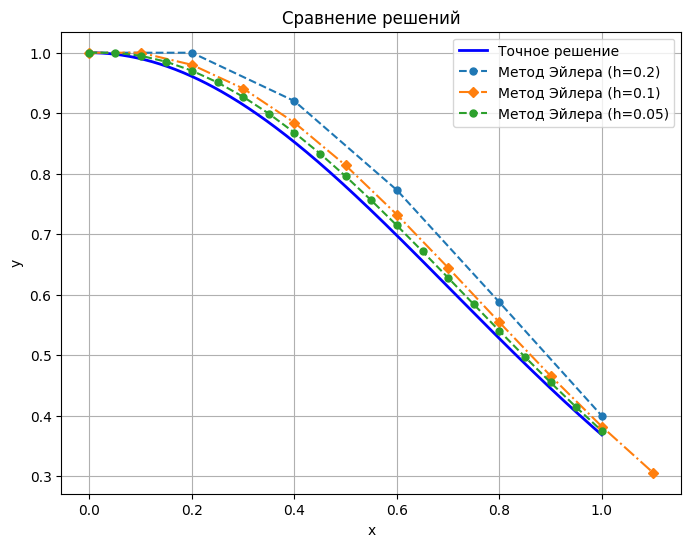

In [7]:
def f(x, y):
    return -2 * x * y

def exact_sol(x):
    return np.exp(-x**2)

x0 = 0.0
y0 = 1.0
xn = 1.0
h_list = [0.2, 0.1, 0.05]

euler_solutions = plot_euler_solutions(f, exact_sol, x0, y0, xn, h_list)

## Проверим функционал на уравнении из презентации: $\frac{dy}{dx} = \frac{y}{(cos(x))^2}$

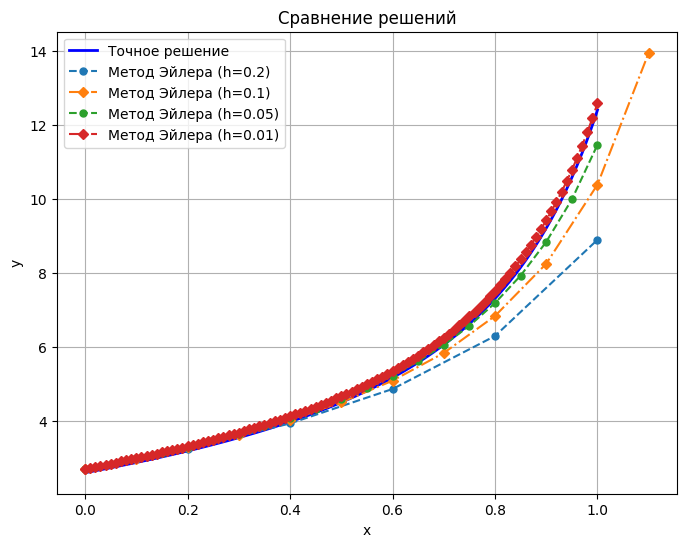

In [9]:
C = 0.96

def f(x, y):
    return y / np.cos(x)**2

def exact_sol(x):
    return np.exp(np.tan(x) + C)

x0 = 0.0
y0 = 2.7183
xn = 1.0
h_list = [0.2, 0.1, 0.05, 0.01]

euler_solutions = plot_euler_solutions(f, exact_sol, x0, y0, xn, h_list)

# Система из 2 уравнений из презентации

$$x' = a x - b x ^ 2 - c xy\\
y' = - d y + e xy$$

In [6]:
def euler_system(funcs, initial_conditions, t0, tn, h):
    """
    Решает систему обыкновенных дифференциальных уравнений (ОДУ) численным методом Эйлера. 
    Принимает набор функций, описывающих производные переменных, и вычисляет приближенные 
    значения переменных на заданном интервале времени.

    Parameters
    ----------
    funcs : list[callable]
        Список функций, каждая из которых определяет производную соответствующей переменной. 
        Каждая функция принимает два аргумента: текущее время `t` и список текущих значений 
        переменных `current_vars`, и возвращает значение производной.
    initial_conditions : list[float]
        Список начальных значений переменных системы ОДУ.
    t0 : float
        Начальное время интегрирования.
    tn : float
        Конечное время интегрирования.
    h : float
        Шаг интегрирования (размер шага для метода Эйлера).

    Returns
    -------
    tuple[list[float], list[list[float]]]
        Кортеж, содержащий два элемента:
        - t_values: список значений времени на интервале [t₀, tₙ] с шагом h.
        - result: список списков, где каждый вложенный список содержит значения 
          соответствующей переменной в последовательные моменты времени.
    """
    t_values = [t0]
    variables = [initial_conditions.copy()]
    
    while t_values[-1] < tn:
        t_current = t_values[-1]
        current_vars = variables[-1]
        
        # Вычисление производных для всех функций
        derivatives = [func(t_current, current_vars) for func in funcs]
        
        # Обновление значений переменных
        next_vars = [current_vars[i] + h * derivatives[i] for i in range(len(current_vars))]
        
        # Сохранение результатов
        t_values.append(t_current + h)
        variables.append(next_vars)
    
    # Разбиение на списки для каждой переменной
    result = []
    for i in range(len(initial_conditions)):
        result.append([step[i] for step in variables])
    
    return t_values, result

In [7]:
# Параметры модели
a, b, c = 1.0, 0.1, 0.02
d, e = 0.5, 0.01

# Начальные условия
initial_conditions = [40, 20]

# Функции системы
def f1(t, vars):
    x, y = vars
    return a * x - b * x**2 - c * x * y

def f2(t, vars):
    x, y = vars
    return -d * y + e * x * y

# Вызов функции
t_vals, [x_vals, y_vals] = euler_system(
    funcs=[f1, f2],
    initial_conditions=initial_conditions,
    t0=0.0,
    tn=10.0,
    h=0.1
)

# Вывод результатов
for t, x, y in zip(t_vals[::10], x_vals[::10], y_vals[::10]):
    print(f"t = {t:.1f}, x = {x:.2f}, y = {y:.2f}")

t = 0.0, x = 40.00, y = 20.00
t = 1.0, x = 10.63, y = 14.50
t = 2.0, x = 8.74, y = 9.59
t = 3.0, x = 8.57, y = 6.28
t = 4.0, x = 8.82, y = 4.12
t = 5.0, x = 9.13, y = 2.71
t = 6.0, x = 9.40, y = 1.79
t = 7.0, x = 9.60, y = 1.18
t = 8.0, x = 9.73, y = 0.78
t = 9.0, x = 9.82, y = 0.52
t = 10.0, x = 9.88, y = 0.34


In [ ]:
def plot_phase_portrait_with_streamplot(funcs, x_range, y_range, t0, tn, h, 
                                        grid_density=20, trajectories=None, 
                                        stream_options=None, euler_options=None):
    """
    Строит фазовый портрет системы обыкновенных дифференциальных уравнений (ОДУ) 
    с визуализацией векторного поля через streamplot и траекторий, вычисленных 
    методом Эйлера. Позволяет анализировать поведение динамической системы.

    Parameters
    ----------
    funcs : list[callable]
        Список из двух функций, описывающих систему ОДУ: [dx/dt, dy/dt]. 
        Каждая функция принимает два аргумента: время `t` и список текущих значений 
        переменных `[x, y]`, и возвращает соответствующую производную.
    x_range : tuple[float, float]
        Диапазон значений по оси X в виде (x_min, x_max).
    y_range : tuple[float, float]
        Диапазон значений по оси Y в виде (y_min, y_max).
    t0 : float
        Начальное время интегрирования для метода Эйлера.
    tn : float
        Конечное время интегрирования для метода Эйлера.
    h : float
        Шаг интегрирования для метода Эйлера.
    grid_density : int, default: 20
        Плотность сетки для построения векторного поля (количество точек на ось).
    trajectories : list[list[float]] or None, default: None
        Список начальных условий для траекторий в формате [[x0, y0], ...]. 
        Если None, траектории не строятся.
    stream_options : dict or None, default: {'color': 'gray', 'linewidth': 1, 'cmap': 'autumn'}
        Параметры настройки streamplot-графика. Примеры: 'color', 'linewidth', 'cmap'.
    euler_options : dict or None, default: {'color': 'blue', 'lw': 1.5}
        Параметры настройки траекторий метода Эйлера. Примеры: 'color', 'lw' (толщина линии).

    Returns
    -------
    None
        Функция не возвращает значение, но выводит графическое представление:
        - Векторное поле, построенное через streamplot.
        - Траектории, вычисленные методом Эйлера (если заданы начальные условия).
    """
    # Настройки по умолчанию
    stream_options = stream_options or {'color': 'gray', 'linewidth': 1, 'cmap': 'autumn'}
    euler_options = euler_options or {'color': 'blue', 'lw': 1.5}

    # Создание сетки
    x = np.linspace(x_range[0], x_range[1], grid_density)
    y = np.linspace(y_range[0], y_range[1], grid_density)
    X, Y = np.meshgrid(x, y)

    # Вычисление векторного поля
    U = np.zeros_like(X)
    V = np.zeros_like(Y)
    
    for i in range(grid_density):
        for j in range(grid_density):
            dx = funcs[0](0, [X[i, j], Y[i, j]])
            dy = funcs[1](0, [X[i, j], Y[i, j]])
            U[i, j] = dx
            V[i, j] = dy

    # Построение векторного поля
    plt.figure(figsize=(8, 6))
    plt.streamplot(X, Y, U, V, **stream_options)  # Использование streamplot для линий тока [[1]]

    # Добавление траекторий
    if trajectories:
        for traj in trajectories:
            _, (x_vals, y_vals) = euler_system(funcs, traj, t0, tn, h)
            plt.plot(x_vals, y_vals, **euler_options)

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Фазовый портрет')
    plt.grid(True)
    plt.axis('equal')
    plt.show()
    

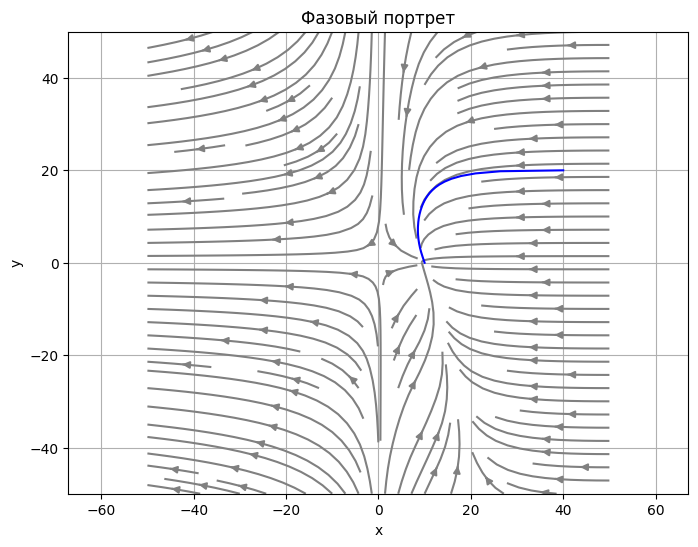

In [9]:
# Параметры модели
a, b, c = 1.0, 0.1, 0.02
d, e = 0.5, 0.01

# Функции системы
def f1(t, vars):
    x, y = vars
    return a * x - b * x**2 - c * x * y

def f2(t, vars):
    x, y = vars
    return -d * y + e * x * y

# Диапазоны для векторного поля
x_range = (-50, 50)
y_range = (-50, 50)

# Траектории для построения
trajectories = [
    [40, 20]
]

# Построение графика
plot_phase_portrait_with_streamplot(
    funcs=[f1, f2],
    x_range=x_range,
    y_range=y_range,
    t0=0.0,
    tn=100.0,
    h=0.1,
    trajectories=trajectories,
    stream_options={'color': 'gray', 'density': 1.2},  # Настройка векторного поля
    euler_options={'color': 'blue', 'lw': 1.5}
)

# Система из 3 уравнений (Аттрактор Лоренца)

$$\begin{cases}
x' = \sigma (y - x)\\
y' = x (r - z) - y\\
z' = xy - bz
\end{cases}$$

In [10]:
def plot_phase_portrait_3d(funcs, initial_conditions, t0, tn, h, 
                           x_range=(-20, 20), y_range=(-30, 30), z_range=(-10, 50), 
                           grid_density=15, stream_options=None, euler_options=None):
    """
    Строит фазовый портрет трёхмерной системы обыкновенных дифференциальных уравнений (ОДУ) 
    с визуализацией векторных полей в проекциях x-y, x-z, y-z и траектории метода Эйлера 
    в 3D-пространстве. Используется для анализа поведения динамических систем, например, системы Лоренца.

    Parameters
    ----------
    funcs : list[callable]
        Список из трёх функций, описывающих систему ОДУ: [dx/dt, dy/dt, dz/dt]. 
        Каждая функция принимает два аргумента: время `t` и список текущих значений 
        переменных `[x, y, z]`, и возвращает соответствующую производную.
    initial_conditions : list[float]
        Начальные значения переменных системы в виде [x₀, y₀, z₀].
    t0 : float
        Начальное время интегрирования для метода Эйлера.
    tn : float
        Конечное время интегрирования для метода Эйлера.
    h : float
        Шаг интегрирования для метода Эйлера.
    x_range : tuple[float, float], default: (-20, 20)
        Диапазон значений по оси X для построения векторного поля.
    y_range : tuple[float, float], default: (-30, 30)
        Диапазон значений по оси Y для построения векторного поля.
    z_range : tuple[float, float], default: (-10, 50)
        Диапазон значений по оси Z для построения векторного поля.
    grid_density : int, default: 15
        Плотность сетки для построения векторного поля (количество точек на ось).
    stream_options : dict or None, default: {'color': 'gray', 'density': 1.0}
        Параметры настройки streamplot-графиков. Примеры: 'color', 'density'.
    euler_options : dict or None, default: {'color': 'blue', 'lw': 1.5}
        Параметры настройки траекторий метода Эйлера. Примеры: 'color', 'lw' (толщина линии).

    Returns
    -------
    None
        Функция не возвращает значение, но выводит:
        - Три 2D-графика с векторными полями и траекториями в проекциях x-y, x-z, y-z.
        - 3D-график траектории системы (без векторного поля).
        Векторные поля вычисляются при фиксированных начальных значениях третьей переменной.
    """
    # Настройки по умолчанию
    stream_options = stream_options or {'color': 'gray', 'density': 1.0}
    euler_options = euler_options or {'color': 'blue', 'lw': 1.5}

    # Решение системы методом Эйлера
    t_vals, result = euler_system(funcs, initial_conditions, t0, tn, h)
    x_vals, y_vals, z_vals = result

    # Создание графиков
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # Проекция на x-y
    x_xy = np.linspace(*x_range, grid_density)
    y_xy = np.linspace(*y_range, grid_density)
    X_xy, Y_xy = np.meshgrid(x_xy, y_xy)
    U_xy = np.zeros_like(X_xy)
    V_xy = np.zeros_like(Y_xy)

    for i in range(grid_density):
        for j in range(grid_density):
            x_val = X_xy[i, j]
            y_val = Y_xy[i, j]
            z_val = z_vals[0]  # Используем начальное значение z
            dx = funcs[0](0, [x_val, y_val, z_val])
            dy = funcs[1](0, [x_val, y_val, z_val])
            U_xy[i, j] = dx
            V_xy[i, j] = dy

    axes[0].streamplot(X_xy, Y_xy, U_xy, V_xy, **stream_options)
    axes[0].plot(x_vals, y_vals, **euler_options)
    axes[0].set_title('Фазовый портрет (x-y)')
    axes[0].set_xlabel('x')
    axes[0].set_ylabel('y')
    axes[0].grid(True)

    # Проекция на x-z
    x_xz = np.linspace(*x_range, grid_density)
    z_xz = np.linspace(*z_range, grid_density)
    X_xz, Z_xz = np.meshgrid(x_xz, z_xz)
    U_xz = np.zeros_like(X_xz)
    V_xz = np.zeros_like(Z_xz)

    for i in range(grid_density):
        for j in range(grid_density):
            x_val = X_xz[i, j]
            z_val = Z_xz[i, j]
            y_val = y_vals[0]  # Используем начальное значение y
            dx = funcs[0](0, [x_val, y_val, z_val])
            dz = funcs[2](0, [x_val, y_val, z_val])
            U_xz[i, j] = dx
            V_xz[i, j] = dz

    axes[1].streamplot(X_xz, Z_xz, U_xz, V_xz, **stream_options)
    axes[1].plot(x_vals, z_vals, **euler_options)
    axes[1].set_title('Фазовый портрет (x-z)')
    axes[1].set_xlabel('x')
    axes[1].set_ylabel('z')
    axes[1].grid(True)

    # Проекция на y-z
    y_yz = np.linspace(*y_range, grid_density)
    z_yz = np.linspace(*z_range, grid_density)
    Y_yz, Z_yz = np.meshgrid(y_yz, z_yz)
    U_yz = np.zeros_like(Y_yz)
    V_yz = np.zeros_like(Z_yz)

    for i in range(grid_density):
        for j in range(grid_density):
            y_val = Y_yz[i, j]
            z_val = Z_yz[i, j]
            x_val = x_vals[0]  # Используем начальное значение x
            dy = funcs[1](0, [x_val, y_val, z_val])
            dz = funcs[2](0, [x_val, y_val, z_val])
            U_yz[i, j] = dy
            V_yz[i, j] = dz

    axes[2].streamplot(Y_yz, Z_yz, U_yz, V_yz, **stream_options)
    axes[2].plot(y_vals, z_vals, **euler_options)
    axes[2].set_title('Фазовый портрет (y-z)')
    axes[2].set_xlabel('y')
    axes[2].set_ylabel('z')
    axes[2].grid(True)

    plt.tight_layout()
    plt.show()

    # 3D-график (без streamplot)
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(x_vals, y_vals, z_vals, **euler_options)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_title('3D-фазовый портрет')
    plt.show()

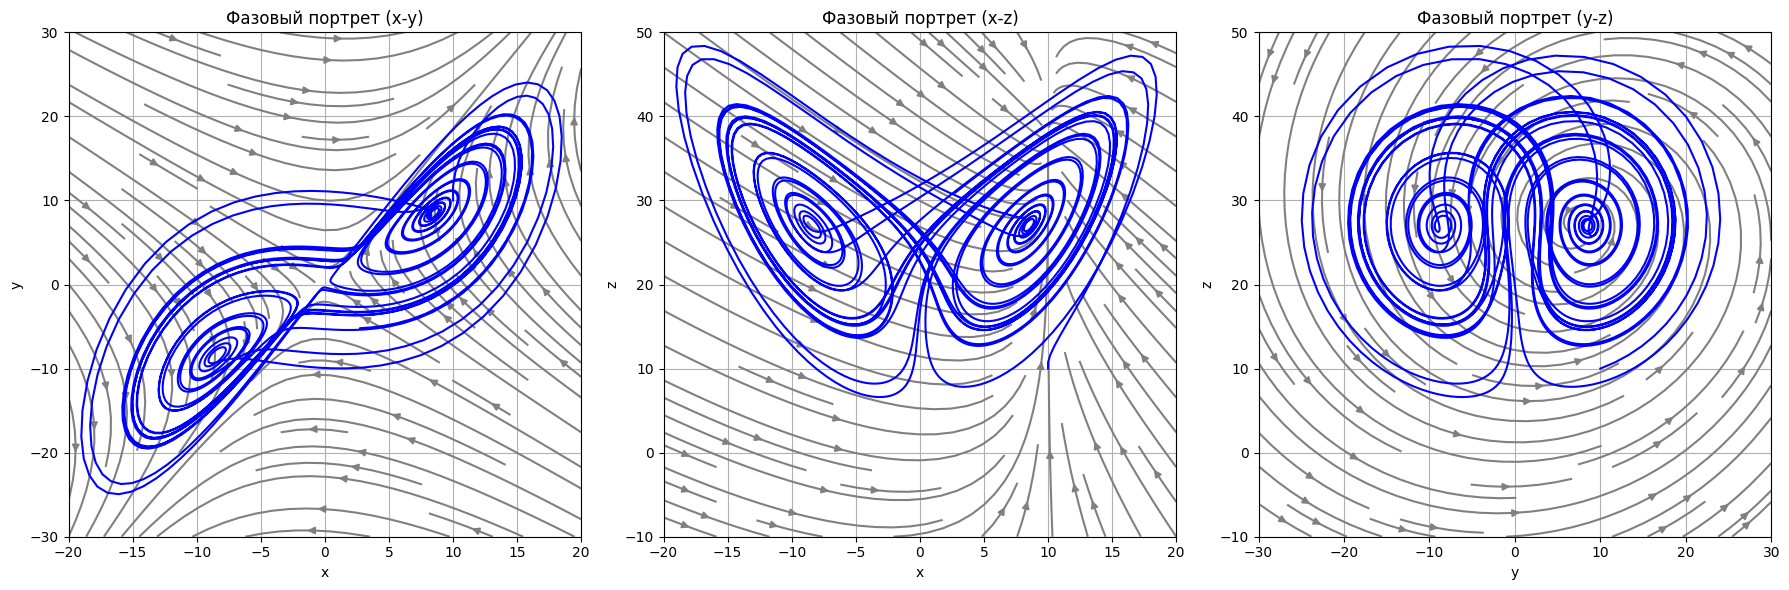

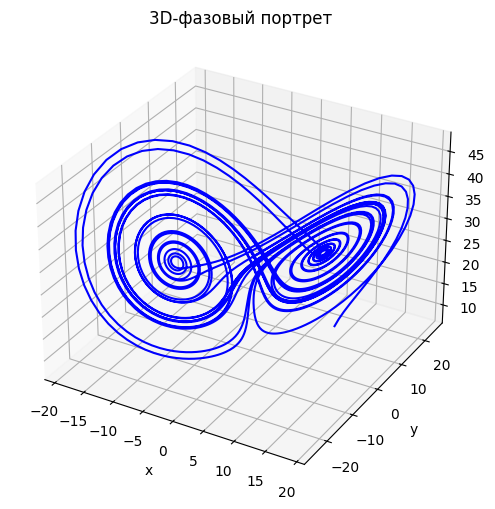

In [11]:

# Параметры модели
sigma = 10
r = 28
b = 8/3

# Функции системы Лоренца
def f_x(t, vars):
    x, y, z = vars
    return sigma * (y - x)

def f_y(t, vars):
    x, y, z = vars
    return x * (r - z) - y

def f_z(t, vars):
    x, y, z = vars
    return x * y - b * z

# Начальные условия
initial_conditions = [10, 10, 10]

# Построение фазового портрета
plot_phase_portrait_3d(
    funcs=[f_x, f_y, f_z],
    initial_conditions=initial_conditions,
    t0=0.0,
    tn=30.0,
    h=0.01,
    x_range=(-20, 20),
    y_range=(-30, 30),
    z_range=(-10, 50),
    grid_density=10,
    stream_options={'color': 'gray', 'density': 1.0},
    euler_options={'color': 'blue', 'lw': 1.5}
)

# Система из 4 уравнений 

$$\begin{cases}
V' = \beta V - \gamma F V\\
C' = \alpha F(t - \tau) V(t - \tau) - \mu_C (C - C_{base})\\
F' = \rho C - \mu_f F - \eta  \gamma  V  F\\
m' = \sigma V - \mu_m m
\end{cases}$$

## Напишем функцию для получения значений с задержкой

In [12]:
def get_delayed_value(history, delay_time, t0):
    '''
    Получает значение из истории с линейной интерполяцией для заданного времени, 
    с возможностью экстраполяции на границах. Используется для восстановления 
    значений в системах с задержкой по времени.

    Parameters
    ----------
    history : list[tuple[float, float]]
        История изменений в формате списка кортежей (время, значение). 
        Должна быть отсортирована по возрастанию времени.
    delay_time : float
        Время, для которого требуется получить значение (обычно t_current - tau).
    t0 : float
        Начальное время системы (используется для обработки случаев delay_time < t0).

    Returns
    -------
    float
        Интерполированное значение для времени delay_time. 
        Возвращает первое значение из истории, если delay_time <= t0 или меньше минимального времени.
        Возвращает последнее значение из истории, если delay_time больше максимального времени.
    '''
    if len(history) == 0:
        raise ValueError("История пуста")
    
    if delay_time <= t0:
        return history[0][1]
    
    times = [t for t, _ in history]
    values = [v for _, v in history]
    
    idx = bisect_right(times, delay_time)
    
    if idx == 0:
        return values[0]
    elif idx >= len(times):
        return values[-1]
    else:
        t0_interp = times[idx - 1]
        t1_interp = times[idx]
        v0_interp = values[idx - 1]
        v1_interp = values[idx]
        
        alpha = (delay_time - t0_interp) / (t1_interp - t0_interp)
        return v0_interp * (1 - alpha) + v1_interp * alpha

## Напишем решатель для нашей системы

In [13]:
def euler_delay_system(funcs, initial_conditions, params, t_end, h):
    '''
    Решает систему обыкновенных дифференциальных уравнений с задержкой методом Эйлера, 
    используя линейную интерполяцию для получения значений с временным сдвигом. 
    В текущей реализации уравнения системы жестко заданы внутри функции, параметры 
    уравнений передаются через словарь `params`.

    Parameters
    ----------
    funcs : list[callable]
        **Не используется в текущей реализации.** Предназначен для передачи функций, 
        вычисляющих производные переменных, но в коде уравнения жестко зашиты.
    initial_conditions : list[float]
        Начальные условия системы в виде [V₀, C₀, F₀, m₀], где:
        - V₀: начальное значение переменной V
        - C₀: начальное значение переменной C
        - F₀: начальное значение переменной F
        - m₀: начальное значение переменной m
    params : dict
        Словарь с параметрами модели, содержащий:
        - beta, gamma, alpha, mu_C, C_star, rho, mu_f, eta, sigma, mu_m, tau, t0
        Обязательные параметры: все перечисленные, кроме t0 (по умолчанию 0).
    t_end : float
        Конечное время интегрирования.
    h : float
        Шаг интегрирования метода Эйлера.

    Returns
    -------
    tuple[list[float], list[float], list[float], list[float], list[float]]
        Кортеж из пяти списков:
        - t_values: временные точки на интервале [t₀, t_end] с шагом h
        - V: значения переменной V в моменты времени t_values
        - C: значения переменной C в моменты времени t_values
        - F: значения переменной F в моменты времени t_values
        - m: значения переменной m в моменты времени t_values

    Notes
    -----
    Для вычисления значений с задержкой (τ) используется функция `get_delayed_value`, 
    которая интерполирует исторические данные из `history`. История хранится в буфере 
    ограниченного размера для оптимизации памяти. Уравнения системы:
    
    dV/dt = βV - γFV  
    dC/dt = αF(t-τ)·V(t-τ) - μ_C(C - C*)  
    dF/dt = ρC - μ_fF - ηγVF  
    dm/dt = σV - μ_m m
    '''
    beta = params['beta']
    gamma = params['gamma']
    alpha = params['alpha']
    mu_C = params['mu_C']
    C_star = params['C_star']
    rho = params['rho']
    mu_f = params['mu_f']
    eta = params['eta']
    sigma = params['sigma']
    mu_m = params['mu_m']
    tau = params['tau']
    try:
        t0 = params['t0']
    except:
        t0 = 0
    
    V0, C0, F0, m0 = initial_conditions
    
    t_values = [t0]
    V = [V0]
    C = [C0]
    F = [F0]
    m = [m0]
    
    history = {
        'V': deque([(t0, V0)]),
        'F': deque([(t0, F0)])
    }
    
    while t_values[-1] < t_end:
        t_current = t_values[-1]
        current_V = V[-1]
        current_C = C[-1]
        current_F = F[-1]
        current_m = m[-1]
        
        delay_time = t_current - tau
        
        delayed_F = get_delayed_value(history['F'], delay_time, t0)
        delayed_V = get_delayed_value(history['V'], delay_time, t0)
        
        dV_dt = beta * current_V - gamma * current_F * current_V
        dC_dt = alpha * delayed_F * delayed_V - mu_C * (current_C - C_star)
        dF_dt = rho * current_C - mu_f * current_F - eta * gamma * current_V * current_F
        dm_dt = sigma * current_V - mu_m * current_m
        
        next_V = current_V + h * dV_dt
        next_C = current_C + h * dC_dt
        next_F = current_F + h * dF_dt
        next_m = current_m + h * dm_dt
        
        history['V'].append((t_current + h, next_V))
        history['F'].append((t_current + h, next_F))
        
        while len(history['V']) > 1 and history['V'][1][0] <= delay_time:
            history['V'].popleft()
        while len(history['F']) > 1 and history['F'][1][0] <= delay_time:
            history['F'].popleft()
        
        t_values.append(t_current + h)
        V.append(next_V)
        C.append(next_C)
        F.append(next_F)
        m.append(next_m)
    
    return t_values, V, C, F, m


## Визуализатор

In [14]:
def plot_phase_portrait_4d(
    funcs, initial_conditions, params, t_end, h,
    pairs=None, grid_density=15,
    stream_options=None, euler_options=None,
    var_ranges=None, axis_limits=None):
    '''
    Строит фазовые портреты для четырёхмерной системы обыкновенных дифференциальных уравнений (ОДУ) 
    с задержкой, визуализируя векторные поля и траектории метода Эйлера для заданных пар переменных.

    Parameters
    ----------
    funcs : list[callable]
        Список из четырёх функций, описывающих систему ОДУ: [dV/dt, dC/dt, dF/dt, dm/dt]. 
        Каждая функция принимает два аргумента: время `t` и список текущих значений 
        переменных `[V, C, F, m]`, и возвращает соответствующую производную.
        **Примечание:** В текущей реализации уравнения жёстко заданы в функции `euler_delay_system`.
    initial_conditions : list[float]
        Начальные условия системы в виде [V₀, C₀, F₀, m₀], где:
        - V₀: начальное значение переменной V
        - C₀: начальное значение переменной C
        - F₀: начальное значение переменной F
        - m₀: начальное значение переменной m
    params : dict
        Словарь с параметрами модели для `euler_delay_system`, включающий:
        beta, gamma, alpha, mu_C, C_star, rho, mu_f, eta, sigma, mu_m, tau, t0.
        Обязательные параметры: все перечисленные, кроме t0 (по умолчанию 0).
    t_end : float
        Конечное время интегрирования.
    h : float
        Шаг интегрирования метода Эйлера.
    pairs : list[tuple[str, str]] or None, default: [('V', 'C'), ('V', 'F'), ('C', 'F'), ('V', 'm')]
        Список пар переменных для отображения фазовых портретов. 
        Если None, используются стандартные пары.
    grid_density : int, default: 15
        Плотность сетки для построения векторного поля (количество точек на ось).
    stream_options : dict or None, default: {'color': 'gray', 'density': 1.0}
        Параметры настройки streamplot для каждой пары в формате {(var1, var2): {params}}.
    euler_options : dict or None, default: {'color': 'blue', 'lw': 1.5}
        Параметры настройки траекторий для каждой пары в формате {(var1, var2): {params}}.
    var_ranges : dict or None, default: {'V': (-10, 10), 'C': (-10, 10), 'F': (-10, 10), 'm': (-10, 10)}
        Диапазоны значений для переменных по умолчанию в формате {var: (min, max)}.
    axis_limits : dict or None, default: {}
        Границы осей для конкретных пар в формате {(var1, var2): (xlim, ylim)}.

    Returns
    -------
    tuple[list[float], list[float], list[float], list[float], list[float]]
        Кортеж из пяти списков:
        - t_vals: временные точки на интервале [t₀, t_end] с шагом h
        - V_vals: значения переменной V в моменты времени t_vals
        - C_vals: значения переменной C в моменты времени t_vals
        - F_vals: значения переменной F в моменты времени t_vals
        - m_vals: значения переменной m в моменты времени t_vals

    Notes
    -----
    1. Для вычисления траекторий используется функция `euler_delay_system`, где уравнения жёстко заданы.
    2. При построении векторного поля для пары (var1, var2) значения других переменных фиксируются 
       на начальных уровнях (var_values[var][0]).
    3. Функция отображает 2D-проекции фазового портрета для указанных пар переменных.
    4. Уравнения системы (внутри `euler_delay_system`):
        dV/dt = βV - γFV  
        dC/dt = αF(t-τ)·V(t-τ) - μ_C(C - C*)  
        dF/dt = ρC - μ_fF - ηγVF  
        dm/dt = σV - μ_m m
    '''

    # Настройки по умолчанию
    default_stream_options = {'color': 'gray', 'density': 1.0}
    default_euler_options = {'color': 'blue', 'lw': 1.5}
    default_var_ranges = {var: (-10, 10) for var in ['V', 'C', 'F', 'm']}

    stream_options = stream_options or {}
    euler_options = euler_options or {}
    var_ranges = var_ranges or default_var_ranges
    axis_limits = axis_limits or {}

    # Используемые переменные
    variables = ['V', 'C', 'F', 'm']

    # Если пары не указаны, построить основные
    if pairs is None:
        pairs = [('V', 'C'), ('V', 'F'), ('C', 'F'), ('V', 'm')]

    # Решение системы
    t_vals, V_vals, C_vals, F_vals, m_vals = euler_delay_system(
        funcs, initial_conditions, params, t_end, h
    )
    var_values = {'V': V_vals, 'C': C_vals, 'F': F_vals, 'm': m_vals}

    # Подготовка графиков
    fig, axes = plt.subplots(2, 2, figsize=(14, 12))
    axes = axes.flatten()

    # Построение для каждой пары
    for ax, (var1, var2) in zip(axes, pairs):
        # Получение параметров для текущей пары
        so = stream_options.get((var1, var2), default_stream_options)
        eo = euler_options.get((var1, var2), default_euler_options)

        # Использовать axis_limits, если они заданы
        if (var1, var2) in axis_limits:
            xlim, ylim = axis_limits[(var1, var2)]
            xr, yr = xlim, ylim
        else:
            xr = var_ranges.get(var1, default_var_ranges[var1])
            yr = var_ranges.get(var2, default_var_ranges[var2])

        # Создание сетки
        x_vals = np.linspace(*xr, grid_density)
        y_vals = np.linspace(*yr, grid_density)
        X, Y = np.meshgrid(x_vals, y_vals)

        # Создание массивов для производных
        U = np.zeros_like(X)
        V = np.zeros_like(Y)

        # Фиксированные значения для других переменных
        fixed_vars = {
            var: var_values[var][0] for var in variables if var not in (var1, var2)
        }

        # Вычисление производных
        for i in range(grid_density):
            for j in range(grid_density):
                # Текущие значения переменных
                current_vars = {
                    var1: X[i, j],
                    var2: Y[i, j],
                    **fixed_vars
                }

                # Упорядочивание переменных по исходному порядку
                ordered_vars = [
                    current_vars[var] for var in variables
                ]

                # Вычисление производных
                derivatives = [func(0, ordered_vars) for func in funcs]

                # Сохранение производных для соответствующих переменных
                idx1 = variables.index(var1)
                idx2 = variables.index(var2)
                U[i, j] = derivatives[idx1]
                V[i, j] = derivatives[idx2]

        # Построение векторного поля
        ax.streamplot(X, Y, U, V, **so)

        # Построение траектории
        ax.plot(var_values[var1], var_values[var2], **eo)

        # Настройка графика
        ax.set_title(f'Фазовый портрет ({var1}-{var2})')
        ax.set_xlabel(var1)
        ax.set_ylabel(var2)
        ax.grid(True)

        # Установка границ осей
        if (var1, var2) in axis_limits:
            ax.set_xlim(axis_limits[(var1, var2)][0])
            ax.set_ylim(axis_limits[(var1, var2)][1])
        else:
            data_x = var_values[var1]
            data_y = var_values[var2]
            ax.set_xlim(min(data_x), max(data_x))
            ax.set_ylim(min(data_y), max(data_y))

        # Удаление внутренних отступов
        ax.margins(0)

    # Удаление лишних графиков
    for k in range(len(pairs), 4):
        fig.delaxes(axes[k])

    plt.tight_layout()
    plt.show()
    
    return t_vals, V_vals, C_vals, F_vals, m_vals

## Решим систему

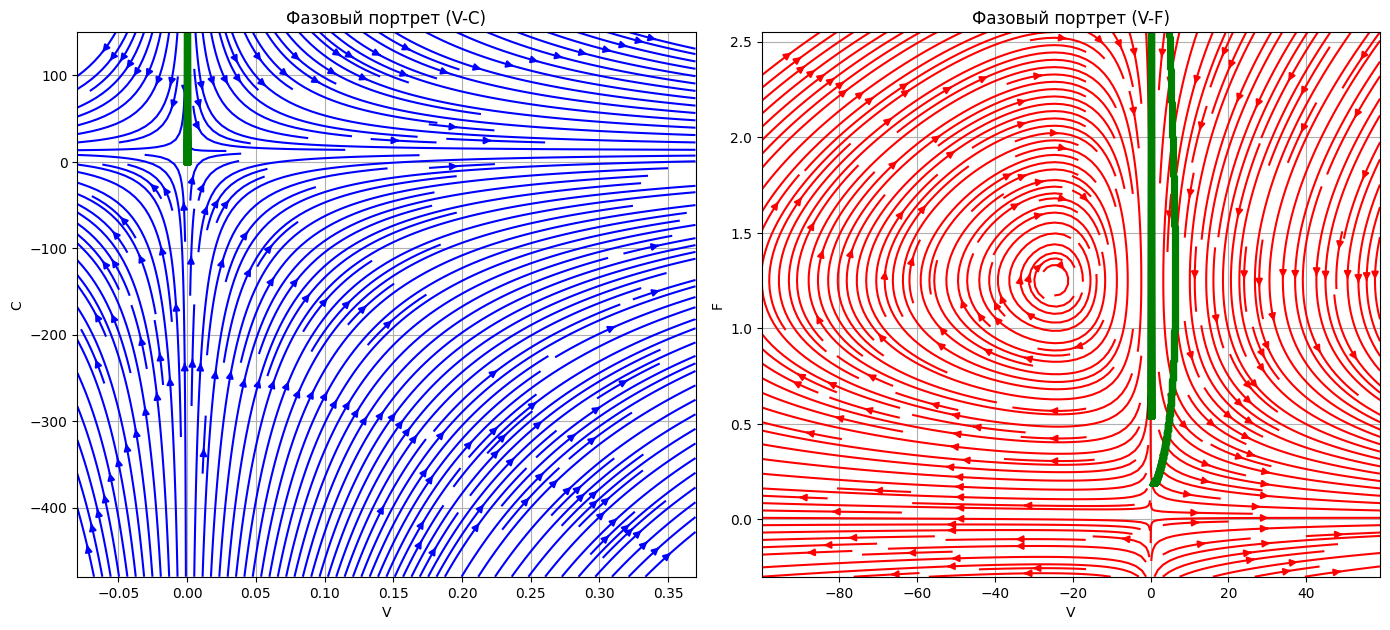

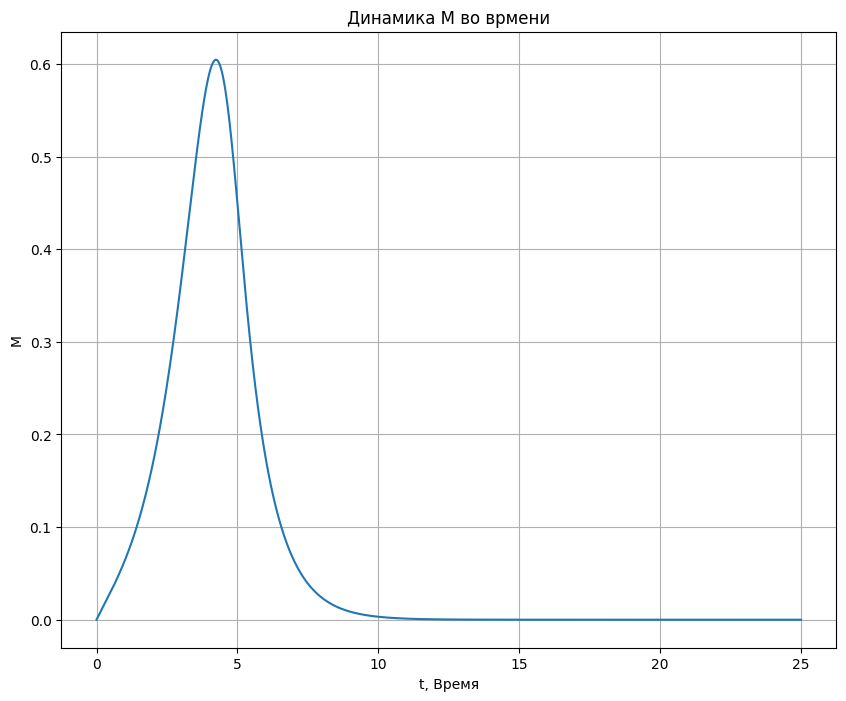

In [66]:
# Параметры модели
params = {
    'beta': 1.0,
    'gamma': 0.8,
    'alpha': 100,
    'mu_C': 0.9, # 0.5
    'C_star': 1,
    'rho': 1e-2,#0.17
    'mu_f': 0.2,#0.2
    'eta': 1e-2,
    'sigma': 0.12,#0.12,
    'mu_m': 1.0,
    'tau': 0.5,
    't0': 0.0,
}

# Функции системы
def f1(t, vars):
    V, C, F, m = vars
    return params['beta'] * V - params['gamma'] * F * V

def make_f2(params, history):
    def f2(t, vars):
        V, C, F, m = vars
        delay_time = t - params['tau']
        delayed_F = get_delayed_value(history['F'], delay_time, params['t0'])
        delayed_V = get_delayed_value(history['V'], delay_time, params['t0'])
        return params['alpha'] * delayed_F * delayed_V - params['mu_C'] * (C - params['C_star'])
    return f2

def f3(t, vars):
    V, C, F, m = vars
    return params['rho'] * C - params['mu_f'] * F - params['eta'] * params['gamma'] * V * F

def f4(t, vars):
    V, C, F, m = vars
    return params['sigma'] * V - params['mu_m'] * m

# Начальные условия
initial_conditions = [0.5, 0.5, 0.2, 0.0]


# Создание истории
history = {
    'V': deque([(params['t0'], initial_conditions[0])]),
    'F': deque([(params['t0'], initial_conditions[2])])
}

# Создание функций с учётом истории
f2_with_history = make_f2(params, history)


# Построение фазового портрета
t_vals, V_vals, C_vals, F_vals, m_vals = plot_phase_portrait_4d(
    funcs=[f1, f2_with_history, f3, f4],
    initial_conditions=initial_conditions,
    params=params,
    t_end=25.0,
    h=1e-3,
    pairs=[('V', 'C'), ('V', 'F')],
    grid_density=100,
    stream_options={
        ('V', 'C'): {'color': 'blue', 'density': 2.5},
        ('V', 'F'): {'color': 'red', 'density': 2.5}
    },
    euler_options={
        ('V', 'C'): {'color': 'green', 'marker': '^', 'markersize': 5},
        ('V', 'F'): {'color': 'green', 'marker': '^', 'markersize': 5}
    },
    axis_limits={
        ('V', 'C'): [(-0.08, 0.37),(-480, 150)],  # (C_min, C_max), (V_min, V_max)
        ('V', 'F'): [(0.02-100, 59),(-0.3, 2.55)]         # (V_min, V_max), (F_min, F_max)
    }
)


plt.rcParams['figure.figsize'] = (10, 8)
plt.plot(t_vals, m_vals)
plt.title('Динамика М во врмени')
plt.xlabel('t, Время')
plt.ylabel('М')
plt.grid()
plt.show()

$\Uparrow$ Зеленым показвно решение

График демонстрирует **выздоровление** организма после инфекционного заболевания:

1. **Рост поражения (0–5 дней):**  
   Концентрация антигенов $ V(t) $ быстро увеличивается, что приводит к росту относительной характеристики поражения $ m(t) $ до максимального значения $ \approx 0.25 $. Это связано с активным размножением антигенов ($ \beta V(t) $) и недостаточной реакцией иммунной системы на ранних этапах.

2. **Спад поражения (5–10 дней):**  
   После пика $ m(t) $ резко снижается до нуля. Это указывает на успешную ликвидацию антигенов за счет действия антител $ F(t) $ и плазматических клеток $ C(t) $. 

3. **Стабилизация (после 10 дней):**  
   $ m(t) $ сохраняет значение близкое к нулю, что соответствует полному выздоровлению. Организм восстанавливается ($ -\mu_m m(t) $), и антигены полностью устранены.

# Ответы на вопросы

1. **Фазовый портрет** визуализирует траектории системы, равновесные точки и их устойчивость, аттракторы/репеллеры. Это помогает анализировать долгосрочное поведение системы, отслеживать переходы между состояниями и оценивать влияние возмущений.  

2. **Задержка τ** вызывает отставание реакции C(t) на изменения V(t) и F(t), что может приводить к колебаниям (например, циклическому росту и спаду плазматических клеток) из-за запаздывающей обратной связи между антигенами и иммунным ответом.  

3. **Метод Эйлера** — численный метод решения ОДУ, использующий линейную аппроксимацию на каждом шаге. Малый шаг **h** повышает точность, но увеличивает вычисления. При большом **h** возникают ошибки аппроксимации, нестабильность и потеря деталей динамики.  

4. **Учет τ важен**, так как он моделирует реальные временные лаги в иммунном ответе (например, время на активацию клеток). Например, без τ модель может недооценить пик вирусной нагрузки, так как не учтет задержку в производстве антител.  

5. **Начальные условия V(0) и F(0)** определяют стартовую точку траектории. Высокий уровень V(0) ускоряет распространение инфекции, а высокий F(0) способствует быстрому подавлению антигенов. Это отражается на фазовом портрете в виде разных сценариев: выздоровления, хронического течения или летального исхода.